<b>Q 1. Make a table of elements from periodic table as following:
• Collect letter symbols of elements in column1
• Collect atomic numbers in column2
• Collect electronegativity in column3
• Collect atomic radii in column4
• Collect thermal conductivity in column5
Perform PCA for understanding trends of thermal conductivity and point out your observations about this
data. Plot graphs using Matplotlib, Seaborn or a similar Python library for discussion. Your discussion
should use more pictures and less text.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("assignment2-1.csv")
df.set_index('Elements')
'''loading the dataset with setting index as symbol'''

'loading the dataset with setting index as symbol'

In [3]:
df = df.dropna()
df.dtypes

Elements                 object
Atomic Number             int64
Electronegativity       float64
Atomic Radius           float64
Thermal Conductivity    float64
density_of_solid        float64
dtype: object

In [4]:
df.describe()

,Atomic Number,Electronegativity,Atomic Radius,Thermal Conductivity,density_of_solid
count,73.000000,73.000000,73.000000,73.000000,73.000000
mean,46.643836,1.612055,1.555479,71.253562,8082.849315
std,23.975317,0.502883,0.340502,85.391434,5536.428290
min,3.000000,0.790000,0.700000,0.205000,535.000000
25%,27.000000,1.200000,1.350000,16.000000,4507.000000
50%,47.000000,1.600000,1.450000,46.000000,7264.000000
75%,66.000000,2.000000,1.800000,94.000000,9780.000000
max,91.000000,2.660000,2.600000,430.000000,22650.000000


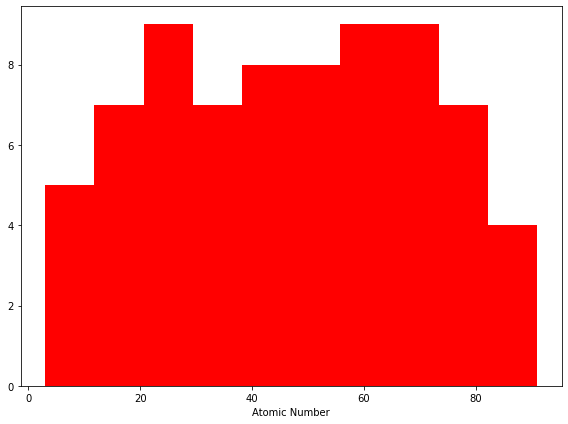

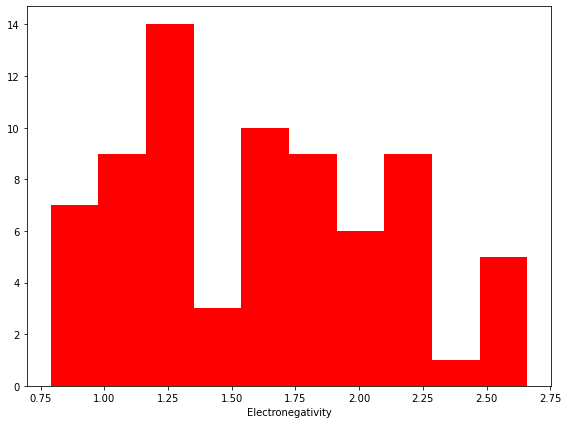

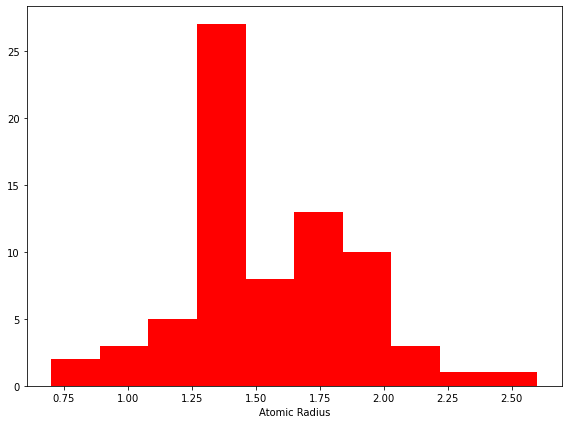

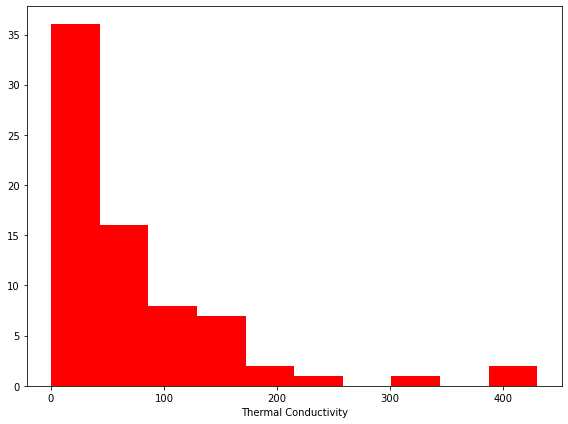

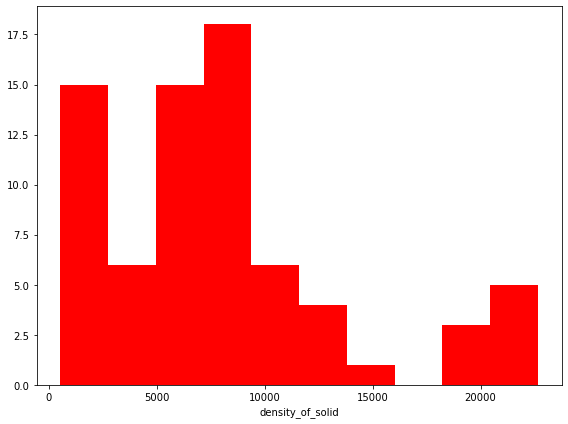

In [5]:
# now making histogram to see that what is the distribution.

for i in df.columns:
    if i != "Elements":
        n_bins = 10
        fig,axs = plt.subplots(1,1,figsize = (8,6),tight_layout = True)
        axs.hist(df[i], bins = n_bins,color ='red')
        plt.xlabel(i)

In [18]:
#Selecting the desired column for PCA analysis
Y = df.iloc[:,2:]
data = np.array(Y)

In [19]:
# using PCA by matrix decomposition
X_standard = (data - np.mean(data,axis =0))/np.std(data,axis = 0)
X_standard
'''Standardising and scalig the data'''

'Standardising and scalig the data'

In [20]:
covariance = np.cov(X_standard.T)

In [21]:
U,D,V = np.linalg.svd(covariance)
D

array([1.9801524 , 1.02218194, 0.88129415, 0.17192707])

In [22]:
explained_variance = []
for i in D:
    explained_variance.append(i/sum(D))
print(explained_variance)

[0.48825675534353746, 0.2520448614116826, 0.21730540650524358, 0.04239297673953636]


<b>PCA analysis showing the trend:<b>
    
1. Here we see that the atomic number being the most important factor and electronegativity being the next 2nd principle component i.e. the thermal conductivity data has the least variance in deciding the parameter
    
2. The data in thermal conductivity is basically discrete and unique in its way.
    
3. We see the atomic radius data is unique and discrete and least scattered. 
    


In [23]:
U

array([[-0.66653471, -0.0591607 , -0.22417347,  0.70850388],
       [ 0.65225507, -0.14287128,  0.27926014,  0.69004702],
       [-0.34230087,  0.16875989,  0.92418039, -0.01551825],
       [-0.11456402, -0.97345154,  0.1328557 , -0.14702565]])

In [24]:
# Checking with library
from sklearn.decomposition import PCA

In [25]:
pca = PCA()
pca.fit(X_standard)

PCA()

In [26]:
print(pca.components_)

[[-0.66653471  0.65225507 -0.34230087 -0.11456402]
 [ 0.0591607   0.14287128 -0.16875989  0.97345154]
 [-0.22417347  0.27926014  0.92418039  0.1328557 ]
 [ 0.70850388  0.69004702 -0.01551825 -0.14702565]]


In [27]:
print(pca.explained_variance_)

[1.9801524  1.02218194 0.88129415 0.17192707]


In [28]:
print(pca.explained_variance_ratio_)

[0.48825676 0.25204486 0.21730541 0.04239298]


We have standardised and scaled the data and found the eigen values as $[1.73,0.995,0.31]^T$
So, the contribution of the data of thermal conductivity is **10%** while the contribution from the electronegativity and atomic radius contribute to the **57%** of the data.

In [29]:
#See the transformed matrix
transform = pca.transform(data)


# Now coming to the plotting part of data

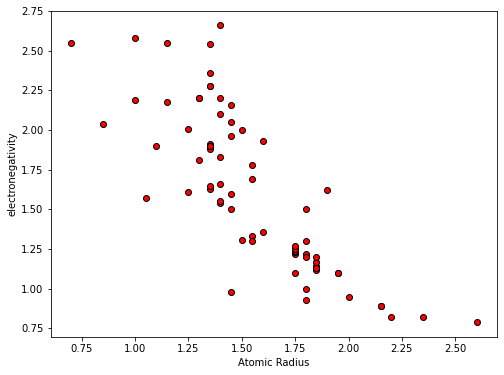

In [30]:
plt.subplots(figsize =(8,6))
plt.scatter(df["Atomic Radius"],df["Electronegativity"],marker = 'o',color = "red",ec ="black")
plt.xlabel("Atomic Radius")
plt.ylabel("electronegativity")
plt.show()

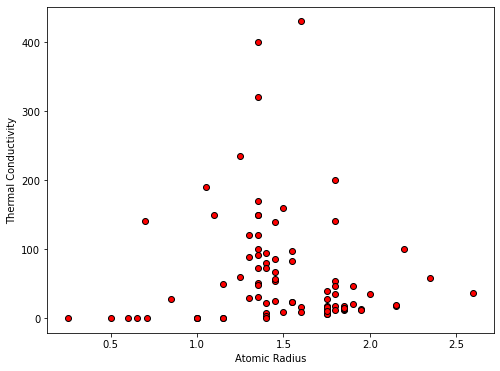

In [131]:
plt.subplots(figsize =(8,6))
plt.scatter(df["Atomic Radius"],df["Thermal Conductivity"],marker = 'o',color = "red",ec ="black")
plt.xlabel("Atomic Radius")
plt.ylabel("Thermal Conductivity")
plt.show()

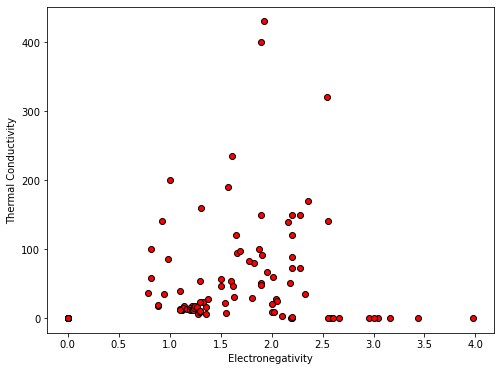

In [132]:
plt.subplots(figsize =(8,6))
plt.scatter(df["Electronegativity"],df["Thermal Conductivity"],marker = 'o',color = "red",ec ="black")
plt.xlabel("Electronegativity")
plt.ylabel("Thermal Conductivity")
plt.show()

# Discussions

'''The plot of elements is as follows:'''

1. We see that in Thermal conductivity vs element plot, we see a large variation in data and some elements have high values as compared to other non metallic elements.

2. In plot of Atomic radius vs element plot, we see that as the atomic number increases the size of atomic radius increases and see the trend that atomic radius decrease in same period of table because of increasing number of protons than electrons and hence more attraction towards nucleus.

3. Electronegativity vs element plot, we see that as the electronegativity increases from left to right. This is because the nuclear charge is increasing faster than the electron shielding, so the attraction that the atoms have for the valence electrons increases. And electronegativity range from 0 to 4.